In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Условие

**В этом домашнем задании вы должны написать свою сплит систему для проведения A/B тестов**

В предоставленных данных есть 50000 юзеров, для каждого есть запись какой-то метрики за 2 года (730 дней).

Данные: https://disk.yandex.ru/d/2mH8fuKCKLeozg


### Ваша задача:

1) Написать алгоритм, которые разбивает данные на 3 группы размера около 5000, которые будут считаться "похожими".

- Для этого вам самостоятельно нужно решить, какие критерии схожести тут применимы и построить необходимые тесты для выбора этих групп.

- Данные 3 группы должны считаться похожими на основе ваших метрик.

- Разбиение затем будет протестировано на следующих 2х годах нами.

2) Визуализировать распределения выбранных вами метрик для найденных групп и сравнить с аналогичными разультатами для случайных групп

In [130]:
data = pd.read_csv('/content/drive/MyDrive/train_data.csv')
data

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30
0,-3.533155,-4.475755,-4.748074,-5.569953,-8.017896,-12.396771,-11.853961,-12.046498,-10.297042,-10.075553,...,-168.163849,-168.728405,-168.971555,-168.824042,-167.700081,-167.634364,-167.856116,-168.743465,-168.231590,-167.913551
1,-3.824475,-1.530769,0.038338,-1.475237,-1.602029,-0.992509,0.302906,1.789140,4.177589,9.273372,...,75.919063,72.909418,75.289867,77.770907,74.099941,72.411474,67.472791,67.084800,66.805609,72.078232
2,-1.616434,-4.658834,-6.746498,-9.979424,-11.683396,-9.507703,-7.614438,-9.735666,-10.754863,-11.058539,...,47.759469,46.596598,50.135737,48.424880,47.740658,46.676116,45.611939,43.331310,45.655325,39.770838
3,-0.157282,1.827617,-2.585284,-4.397189,0.113494,7.614615,5.456654,5.928451,6.953534,4.514409,...,318.364962,319.281629,322.614999,325.200268,324.745069,326.519830,326.467326,321.806523,321.286907,323.570847
4,2.056969,10.187929,8.559520,8.579555,9.464262,9.038088,10.875990,9.883777,8.026472,13.040411,...,-38.079584,-38.515039,-38.031876,-36.610698,-37.753387,-35.470938,-35.454435,-35.026979,-35.633306,-35.460477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-3.587807,-3.483476,-5.662556,-3.837491,-5.530929,-9.273811,-11.937906,-14.508804,-14.150711,-14.562552,...,-741.363369,-741.022973,-741.129730,-742.161579,-742.406547,-744.432050,-744.743253,-745.921464,-746.156278,-746.277952
49996,-0.380924,-2.764911,-1.806310,-1.504112,-0.716610,-1.032476,0.261067,0.698457,1.761118,2.989615,...,-105.893100,-104.987557,-105.008367,-106.021453,-105.188027,-106.482869,-105.304146,-106.512414,-104.768522,-105.871369
49997,5.238142,2.849922,2.889722,4.794517,3.693688,1.836000,2.844668,3.958795,3.108119,3.574019,...,-243.925622,-243.997646,-246.100857,-248.317254,-248.064941,-247.333195,-248.392125,-240.174788,-238.412495,-239.414134
49998,-1.019643,-1.218311,-1.865265,-3.136355,-6.201435,-5.453041,-6.738012,-1.265761,-0.757471,-3.450860,...,980.226549,981.486257,980.363861,980.776530,980.699069,979.576181,984.177939,983.178530,976.018038,979.440915


### Нужно реализовать следующие функции (вы можете добавлять какие-то побочные, если считаете нужным):

`generate_groups`  - функция, которая по данным и числу групп делает случайное разбиение данных на примерно одинаковые части по количеству групп

`conduct_test_on_pair` - функция проводит статистические тесты между двумя данными группами и возвращает нужные статистики и результаты

`conduct_tests` -- по списку групп и количеству необходимых похожих групп (зафиксировано в условии задачи как 3) перебирает возможные тройки групп пока не найдет похожие, критерий остановки за вами

`find_groups` -- берет данные и число групп, на которое вы их разбиваете и ищет 3 группы удовлетворяющие вашим критериям схожести.

Рекомендуем начинать с того, чтобы искать разбиение на 2 группы, а не 3, чтобы проверить, что сплит система работает адекватно. Задача с двумя группами зачастую сильно проще, чем с тремя.

Группы должны состоять из уникальных клиентов без дубликатов, один клиент может быть только в одной группе. То есть должны выбирать группы из датасета без повторений и у групп не должно быть пересечений.

 Про то, по каким параметрам оценивать группы: в этом задании вам требуется найти группы, в которых распределения **средних значений и дисперсии данной последовательности** по пользователям похожи. То есть вам нужно вычислить среднее значение и дисперсию данной последовательности для каждого пользователя, а затем проверить, что распределения результатов между группами схожи по вашим тестам.


**Замечание**: Для разбиения на группы и сравнения похожести можете брать любую метрику и считать любой критерии, но мы будем сравнивать именно метрику «среднее» и дисперсию на следующих по времени данных

#### Про систему оценивания: При оценивании мы будем проверять полученные вами группы как на этих данных, так и на следующих двух годах. При проверке будем учитывать и качество полученных групп при помощи метрик.

# Напишите функции

In [16]:
import random
import itertools

#### Смотрю на данные

Немного подготовим данные. Для начала посмотрим на них.

In [ ]:
data.describe()

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,-0.282603,-0.614937,-0.794295,-1.047297,-1.579679,-1.663989,-1.957455,-2.226088,-2.319291,-2.442143,...,-1.414485e+02,-1.414062e+02,-1.415297e+02,-1.416228e+02,-1.417284e+02,-1.435830e+02,-1.437136e+02,-1.439723e+02,-1.441779e+02,-1.443164e+02
std,66.531756,70.297982,72.877186,77.685711,113.240245,115.269136,119.054019,119.707275,129.174494,130.065251,...,1.232938e+04,1.232954e+04,1.232955e+04,1.232957e+04,1.232967e+04,1.233503e+04,1.233504e+04,1.233508e+04,1.233513e+04,1.233519e+04
min,-8225.979300,-8226.032098,-8226.802337,-8226.687422,-18078.755769,-18079.571518,-18079.924820,-18080.604958,-18080.716523,-18079.480921,...,-1.944398e+06,-1.944398e+06,-1.944398e+06,-1.944399e+06,-1.944401e+06,-1.944401e+06,-1.944401e+06,-1.944401e+06,-1.944402e+06,-1.944404e+06
25%,-1.201702,-1.976248,-2.706543,-3.371208,-3.994414,-4.575693,-5.136655,-5.696457,-6.207450,-6.735799,...,-2.597540e+02,-2.612634e+02,-2.609355e+02,-2.616347e+02,-2.623709e+02,-2.619851e+02,-2.618016e+02,-2.625793e+02,-2.634931e+02,-2.649793e+02
50%,-0.168333,-0.332705,-0.480339,-0.589660,-0.712118,-0.802565,-0.881749,-0.929671,-1.022579,-1.100142,...,-1.667193e+01,-1.673862e+01,-1.679393e+01,-1.675796e+01,-1.677567e+01,-1.687075e+01,-1.676787e+01,-1.668977e+01,-1.663300e+01,-1.667277e+01
75%,0.826503,1.214570,1.585432,1.846374,2.133711,2.410134,2.653399,2.909673,3.146026,3.336793,...,4.357917e+01,4.357608e+01,4.361188e+01,4.376412e+01,4.394038e+01,4.400703e+01,4.401682e+01,4.383006e+01,4.392188e+01,4.401341e+01
max,9872.225382,9866.606943,9868.570586,9863.863205,9864.354400,9863.967306,9928.345616,9927.282852,9927.649463,9925.666424,...,9.109811e+05,9.109812e+05,9.109764e+05,9.109762e+05,9.109773e+05,9.109781e+05,9.109727e+05,9.109735e+05,9.109737e+05,9.109829e+05


Видим, что 75%-квантиль достаточно маленький, а максимальное и минимальное значения -- очень большие (с течением временем метрика растет, но экстремальность некоторых значений остается). Посмотрим, много ли таких значений.

In [ ]:
quantile_99 = data.quantile(0.99)
data[data <= quantile_99].describe()

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30
count,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,...,4.950000e+04,4.950000e+04,4.950000e+04,4.950000e+04,4.950000e+04,4.950000e+04,4.950000e+04,4.950000e+04,4.950000e+04,4.950000e+04
mean,-0.748805,-1.197856,-1.533002,-1.942818,-2.602234,-2.877990,-3.258060,-3.576617,-3.928647,-4.207299,...,-3.026462e+02,-3.028091e+02,-3.029904e+02,-3.030805e+02,-3.032794e+02,-3.051557e+02,-3.053114e+02,-3.055797e+02,-3.057918e+02,-3.059690e+02
std,48.295292,53.258080,55.760734,60.075707,101.069985,101.819560,105.907115,106.615865,109.637847,109.876767,...,1.027585e+04,1.027588e+04,1.027589e+04,1.027591e+04,1.027595e+04,1.028241e+04,1.028245e+04,1.028248e+04,1.028251e+04,1.028253e+04
min,-8225.979300,-8226.032098,-8226.802337,-8226.687422,-18078.755769,-18079.571518,-18079.924820,-18080.604958,-18080.716523,-18079.480921,...,-1.944398e+06,-1.944398e+06,-1.944398e+06,-1.944399e+06,-1.944401e+06,-1.944401e+06,-1.944401e+06,-1.944401e+06,-1.944402e+06,-1.944404e+06
25%,-1.217808,-1.999871,-2.736160,-3.408575,-4.046758,-4.627110,-5.198107,-5.762959,-6.283101,-6.820444,...,-2.801660e+02,-2.810547e+02,-2.819629e+02,-2.819209e+02,-2.822060e+02,-2.835979e+02,-2.834541e+02,-2.837993e+02,-2.831171e+02,-2.845097e+02
50%,-0.186354,-0.361843,-0.515659,-0.636242,-0.765633,-0.855437,-0.957557,-1.009789,-1.093697,-1.190168,...,-1.781644e+01,-1.780678e+01,-1.795013e+01,-1.795991e+01,-1.794482e+01,-1.797512e+01,-1.792231e+01,-1.789026e+01,-1.793385e+01,-1.791086e+01
75%,0.784550,1.156852,1.495094,1.754142,2.022921,2.270601,2.512669,2.763453,2.975625,3.155295,...,4.119444e+01,4.129639e+01,4.132460e+01,4.141326e+01,4.157265e+01,4.155965e+01,4.170492e+01,4.153670e+01,4.161140e+01,4.146744e+01
max,7.077396,10.785567,14.005015,16.910929,19.268061,21.741675,24.677010,26.767910,28.954329,31.744552,...,1.688740e+03,1.686847e+03,1.684664e+03,1.691591e+03,1.691796e+03,1.691493e+03,1.697301e+03,1.698224e+03,1.699178e+03,1.702960e+03


Выглядит гораздо лучше, берем! Всю эту обработку положим в одну функцию:

#### Пишу функции и рассказываю свою логику

### **Итак, мои функции:**

- preprocessing: небольшая предобработка данных, которую я описала выше;

- generate_groups: случайным образом разбивает табличку на group_num групп;

- pair_cost: считает кост для двух групп (минимизация MSE для среднего и дисперсии по столбцам - то есть для каждой даты);

- triple_cost: считает кост для трех групп как среднее попарных костов;

- choose_start: выбирает лучший старт в функции generate_greedy (перебирает 50 случайных троек групп на наименьший кост и берет лучшую в качестве начала трех групп);

- generate_greedily: получает на вход список маленьких групп и по ним жадно составляет три группы с минимальным костом;

- find_best_rows: функция generate_greedily позволяет каждой группе быть размера большего, чем 5000. Из полученных в generate_greedily группах мы выбираем лучшие 5000 строк (чтобы у итоговых групп получился наименьший кост);

- find_groups: собирает все вместе. Делает пять попыток жадно собрать группы по разным разбиениям и берет лучшие.

### Сами функции

In [138]:
np.random.seed(42)

def generate_groups(df, group_num):
    """
    Splits users into group_num groups of similar size

    df : Dataframe with all user data, can be pandas, numpy or whatever you like
    group_num : number of groups to split into

    returns a list of dataframes of generated groups
    """

    user_num = df.shape[0]
    group = np.array([random.randint(0, group_num - 1) for _ in range(user_num)])
    groups = [[] for _ in range(group_num)]

    for g in range(group_num):
      groups[g] = df[group == g].reset_index(drop=True)

    return groups

def pair_cost(df_1, df_2):
    """
    Conducts statistical test or tests on two given groups to decide if they are similar

    df_i : Dataframe of users of a single group

    returns p-value or anything you need further
    """

    df1_m = pd.DataFrame({'mean': df_1.mean(axis=0), 'var': df_1.var(axis=0)})
    df2_m = pd.DataFrame({'mean': df_2.mean(axis=0), 'var': df_2.var(axis=0)})

    mean = ((df1_m['mean'] - df2_m['mean'])**2).mean()
    var = ((df1_m['var'] - df2_m['var'])**2).mean()

    return 0.8 * mean + 0.2 * var

def triple_cost(df_1, df_2, df_3):
    return (pair_cost(df_1, df_2) + pair_cost(df_1, df_3) + pair_cost(df_2, df_3))/3

def generate_greedily(dfs):
    """
    Делаю тут жадный подбор групп
    """

    # начальный выбор групп: 3 случайно, остальные в unassigned
    group_num = len(dfs)
    indxs = [random.randint(0, group_num - 1), random.randint(0, group_num - 1), random.randint(0, group_num - 1)]
    base = [dfs[indxs[0]], dfs[indxs[1]], dfs[indxs[2]]]

    other = list(set(range(0, group_num)) - set(indxs))
    unassigned = [dfs[i] for i in other]

    best_metrics = triple_cost(base[0], base[1], base[2])
    num_stab = 0
    stop = set()
    for subg in unassigned:
      round_metrics = []
      for group in range(3):
        if group in stop:
          round_metrics.append(np.infty)
          continue
        base_new = pd.concat([base[group], subg])
        groups_left = [x for x in range(3) if x != group]
        new_metrics = triple_cost(base_new, base[groups_left[0]], base[groups_left[1]])
        round_metrics.append(new_metrics)
      best_curmetrics, best_group = min(round_metrics), np.argmin(np.array(round_metrics))
      if best_group in stop:
        print(round_metrics, stop)
      if best_curmetrics <= best_metrics:
        base[best_group] = pd.concat([base[best_group], subg])
        num_stab = 0
      else:
        num_stab += 1
        if num_stab >= 5:
          base[best_group] = pd.concat([base[best_group], subg])

      if len(base[0]) >= 7000:
        stop.add(0)
      if len(base[1]) >= 7000:
        stop.add(1)
      if len(base[2]) >= 7000:
        stop.add(2)

      if len(base[0]) >= 6800 and len(base[1]) >= 6800 and len(base[2]) >= 6800:
        return base
    return base

def select_random_rows(matrix):
  return matrix.sample(n=5000).reset_index(drop=True)

def find_best_rows(base):
  best = triple_cost(base[0], base[1], base[2])
  is_found = False
  for _ in range(250):
    A = select_random_rows(base[0])
    B = select_random_rows(base[1])
    C = select_random_rows(base[2])

    if triple_cost(A, B, C) < best:
      is_found = True
      A_best = A.copy()
      B_best = B.copy()
      C_best = C.copy()
      best = triple_cost(A, B, C)

  if is_found:
    return A_best, B_best, C_best
  else:
    return base[0], base[1], base[2]

def find_groups(df):
    """
    Splits df imto groups and conducts tests on subsets of the groups until necessary groups are found
    """
    best_res = np.infty
    A_best, B_best, C_best = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

    for i in range(4):
        dfs = generate_groups(df, 700)
        groups = generate_greedily(dfs)
        A, B, C = find_best_rows(groups)
        full_metrics_ = triple_cost(A, B, C)
        if full_metrics_ < best_res:
          best_res = full_metrics_
          A_best = A.copy()
          B_best = B.copy()
          C_best = C.copy()
    return A_best, B_best, C_best

# Visualize groups

Тут секция, где вам нужно визуализировать распределения выбранных вами метрик для найденных групп и сравнить с аналогичными разультатами для случайных групп

In [ ]:
groups_random = generate_groups(data, 3)
my_groups = find_groups(data)

In [11]:
users = pd.DataFrame({'group A': my_groups[0].index, 'group B': my_groups[1].index, 'group C': my_groups[2].index})
users.to_csv('users.csv', index=False)

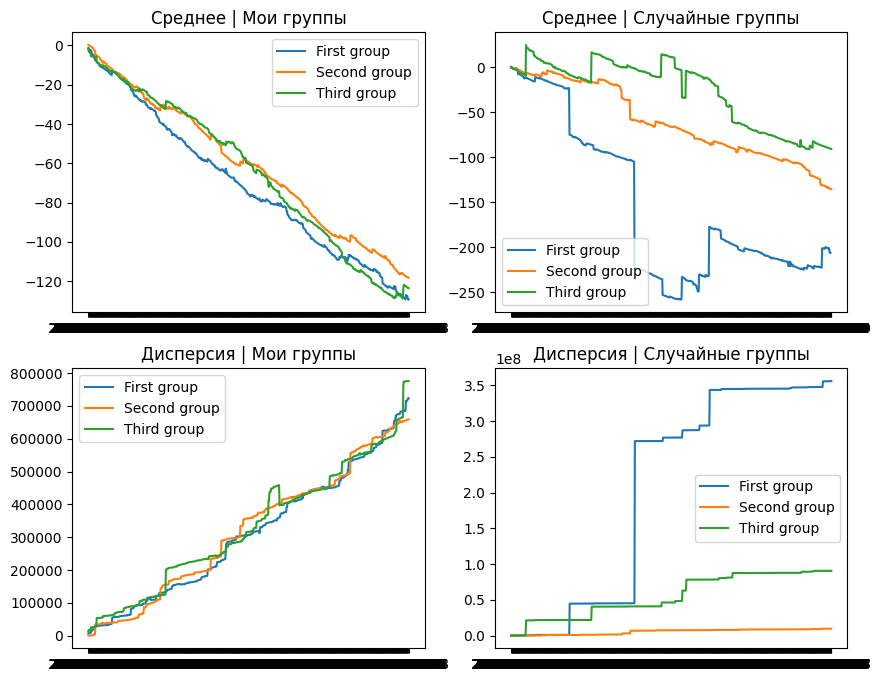

In [142]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].plot(my_groups[0].iloc[:, :-2].mean(0), label='First group')
axes[0, 0].plot(my_groups[1].iloc[:, :-2].mean(0), label='Second group')
axes[0, 0].plot(my_groups[2].iloc[:, :-2].mean(0), label='Third group')
axes[0, 0].set_title('Среднее | Мои группы')
axes[0, 0].legend()

axes[0, 1].plot(groups_random[0].iloc[:, :-2].mean(0), label='First group')
axes[0, 1].plot(groups_random[1].mean(0), label='Second group')
axes[0, 1].plot(groups_random[2].mean(0), label='Third group')
axes[0, 1].set_title('Среднее | Случайные группы')
axes[0, 1].legend()

axes[1, 0].plot(my_groups[0].iloc[:, :-2].var(0), label='First group')
axes[1, 0].plot(my_groups[1].iloc[:, :-2].var(0), label='Second group')
axes[1, 0].plot(my_groups[2].iloc[:, :-2].var(0), label='Third group')
axes[1, 0].set_title('Дисперсия | Мои группы')
axes[1, 0].legend()

axes[1, 1].plot(groups_random[0].iloc[:, :-2].var(0), label='First group')
axes[1, 1].plot(groups_random[1].iloc[:, :-2].var(0), label='Second group')
axes[1, 1].plot(groups_random[2].iloc[:, :-2].var(0), label='Third group')
axes[1, 1].set_title('Дисперсия | Случайные группы')
axes[1, 1].legend()

# 2 способ!

In [21]:
np.random.seed(35)

def preprocessing(data):
  quantile_99 = data.quantile(0.99)
  data = data[data <= quantile_99]

  return data

def generate_groups(df, group_num):
    """
    Splits users into group_num groups of similar size

    df : Dataframe with all user data, can be pandas, numpy or whatever you like
    group_num : number of groups to split into

    returns a list of dataframes of generated groups
    """

    user_num = df.shape[0]
    group = np.array([random.randint(0, group_num - 1) for _ in range(user_num)])
    groups = [[] for _ in range(group_num)]

    for g in range(group_num):
      groups[g] = df[group == g].reset_index(drop=True)

    return groups

def pair_cost(df_1, df_2):
    """
    Conducts statistical test or tests on two given groups to decide if they are similar

    df_i : Dataframe of users of a single group

    returns p-value or anything you need further
    """

    p_mean = stats.mannwhitneyu(df_1['mean'], df_2['mean']).pvalue
    p_var = stats.mannwhitneyu(df_1['var'], df_2['var']).pvalue
    return (p_mean >= 0.9) * (p_var >= 0.9)

def conduct_tests(dfs, group_num):
    """
    Goal is to find out if there is group_num groups in the dfs list which are similar enough according to your criterion.
    For every (or maybe not every) selection of group_num groups from the dfs list and conducts pairwise tests on selected subset using pair_cost.

    dfs : list of dataframes of groups

    returns list of selected groups or None if there are no similar groups
    """
    group_indxs = list(range(len(dfs)))
    triples = itertools.combinations(group_indxs, group_num)
    for A_ind, B_ind, C_ind in triples:
      m1 = pair_cost(dfs[A_ind], dfs[B_ind])
      if m1: m2 = pair_cost(dfs[A_ind], dfs[C_ind])
      else: continue
      if m2: m3 = pair_cost(dfs[B_ind], dfs[C_ind])
      else: continue
      if m3: return A_ind, B_ind, C_ind
    return None

def find_groups(df, group_num):
    """
    Splits df imto groups and conducts tests on subsets of the groups until necessary groups are found
    """
    data = df.copy()
    data = preprocessing(data)
    data['mean'] = data.mean(1)
    data['var'] = data.var(1)
    for i in range(100000):
        dfs = generate_groups(data, group_num)
        result = conduct_tests(dfs, 3)

        if result is not None:
            return dfs[result[0]].iloc[:, :-2], dfs[result[1]].iloc[:, :-2], dfs[result[2]].iloc[:, :-2]

In [22]:
groups_random = generate_groups(data, 3)
my_groups = find_groups(data, 500)

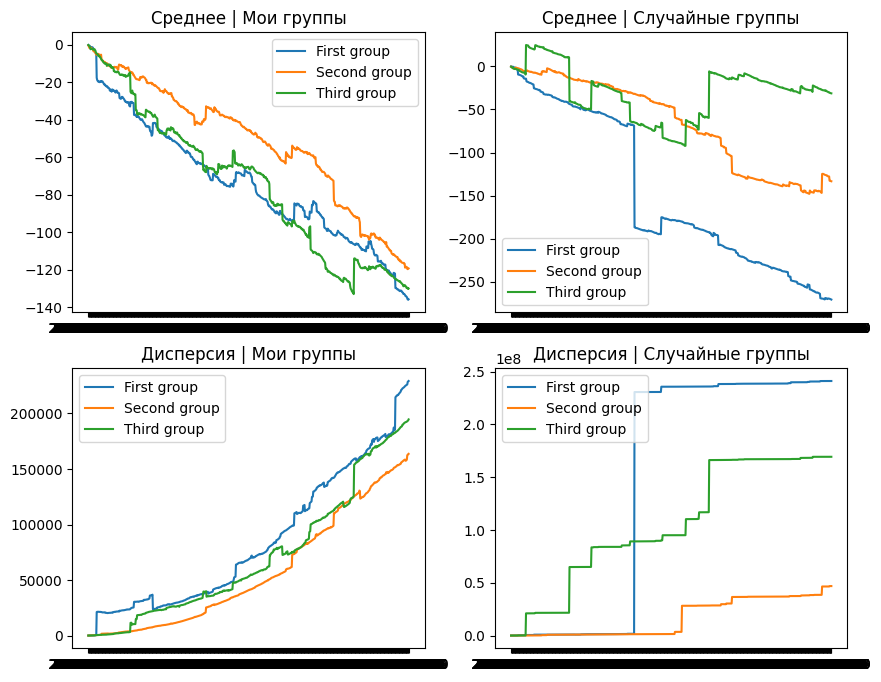

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].plot(my_groups[0].mean(0), label='First group')
axes[0, 0].plot(my_groups[1].mean(0), label='Second group')
axes[0, 0].plot(my_groups[2].mean(0), label='Third group')
axes[0, 0].set_title('Среднее | Мои группы')
axes[0, 0].legend()

axes[0, 1].plot(groups_random[0].mean(0), label='First group')
axes[0, 1].plot(groups_random[1].mean(0), label='Second group')
axes[0, 1].plot(groups_random[2].mean(0), label='Third group')
axes[0, 1].set_title('Среднее | Случайные группы')
axes[0, 1].legend()

axes[1, 0].plot(my_groups[0].var(0), label='First group')
axes[1, 0].plot(my_groups[1].var(0), label='Second group')
axes[1, 0].plot(my_groups[2].var(0), label='Third group')
axes[1, 0].set_title('Дисперсия | Мои группы')
axes[1, 0].legend()

axes[1, 1].plot(groups_random[0].var(0), label='First group')
axes[1, 1].plot(groups_random[1].var(0), label='Second group')
axes[1, 1].plot(groups_random[2].var(0), label='Third group')
axes[1, 1].set_title('Дисперсия | Случайные группы')
axes[1, 1].legend()